In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/models_w_props.csv')

In [3]:
df["extr_stack_fault_energy_fcc"] = df["extr_stack_fault_energy_fcc"][(df["extr_stack_fault_energy_fcc"] < .1) &
                                       (df["extr_stack_fault_energy_fcc"] > .0001)]


<Axes: xlabel='gb_coeff_111', ylabel='strength_MPa'>

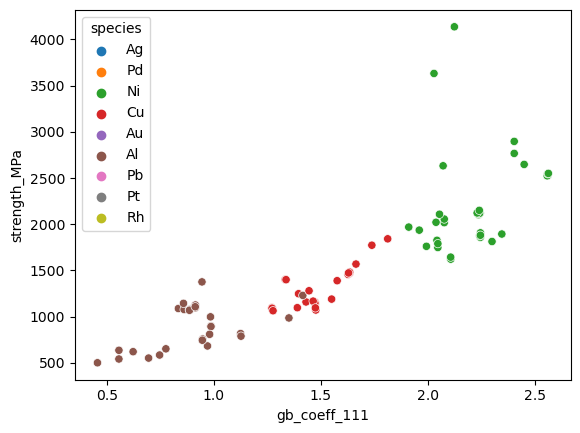

In [4]:
sns.scatterplot(data= df,x="gb_coeff_111",y="strength_MPa", hue='species')

<Axes: xlabel='x', ylabel='strength'>

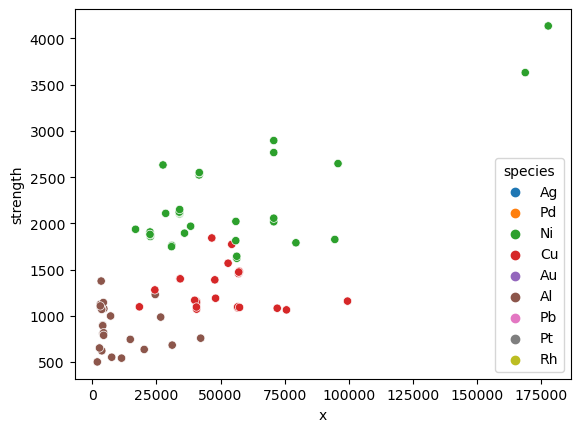

In [5]:
y = df['strength_MPa'].values
x = df['c44_fcc']*df['gb_coeff_111'].values/df['extr_stack_fault_energy_fcc'].values
species = df['species'].values
df_test = pd.DataFrame({'x':x,
                        'strength':y,
                        'species':species})
sns.scatterplot(data = df_test, x='x',y="strength", hue='species')

In [6]:
to_try = ['lattice_constant_fcc','c44_fcc','c12_fcc','c11_fcc','cohesive_energy_fcc','surface_energy_111_fcc','extr_stack_fault_energy_fcc','intr_stack_fault_energy_fcc','unstable_stack_energy_fcc','unstable_twinning_energy_fcc','relaxed_formation_potential_energy_fcc','vacancy_migration_energy_fcc']

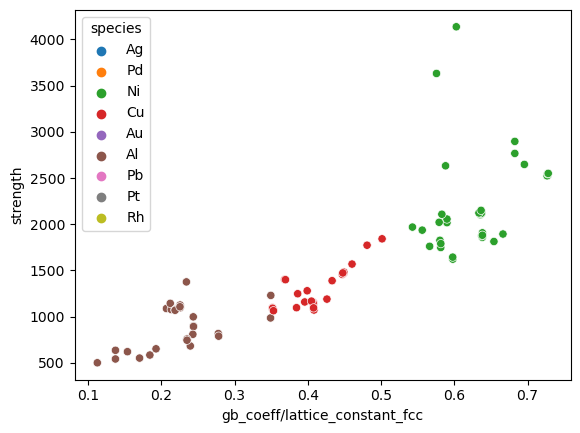

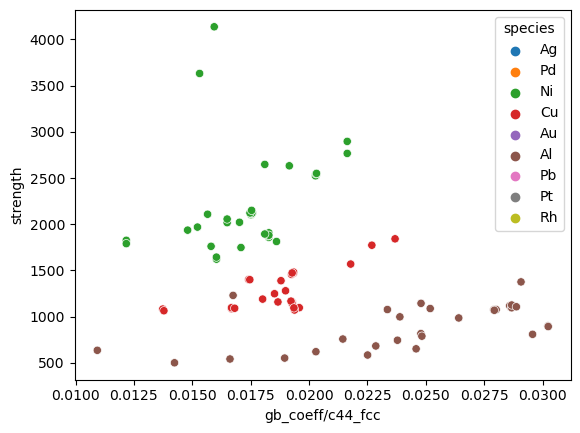

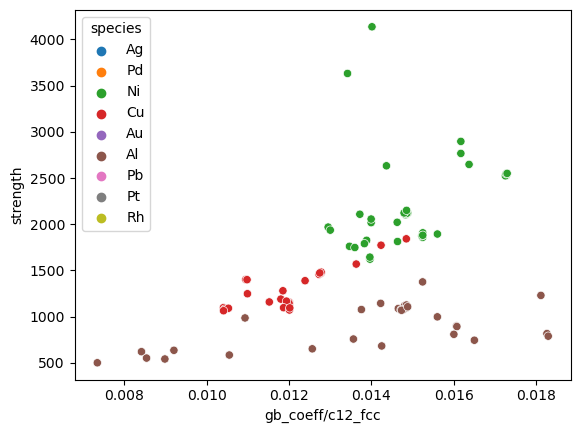

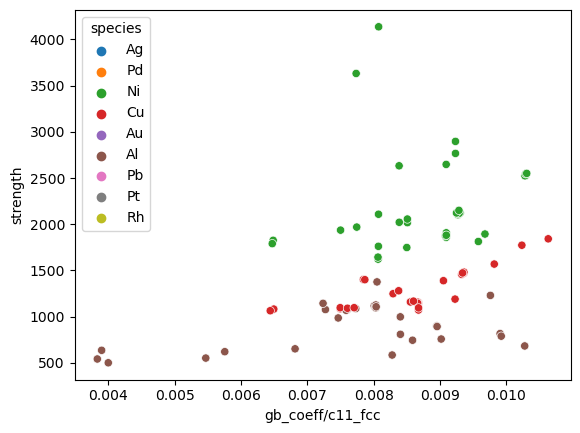

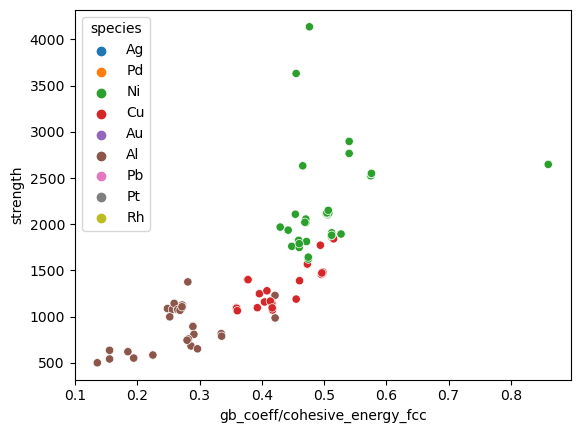

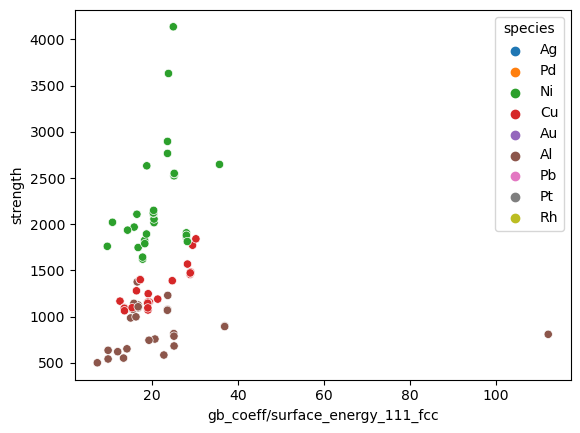

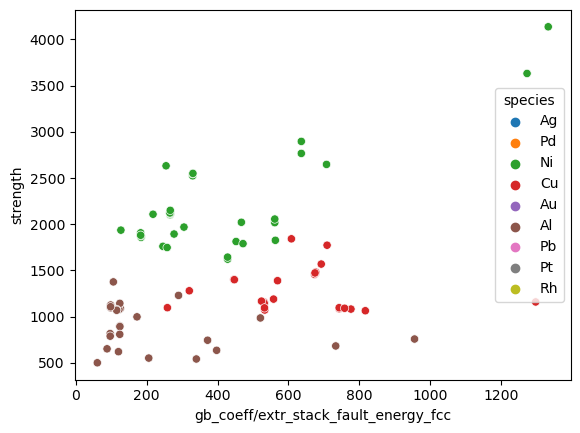

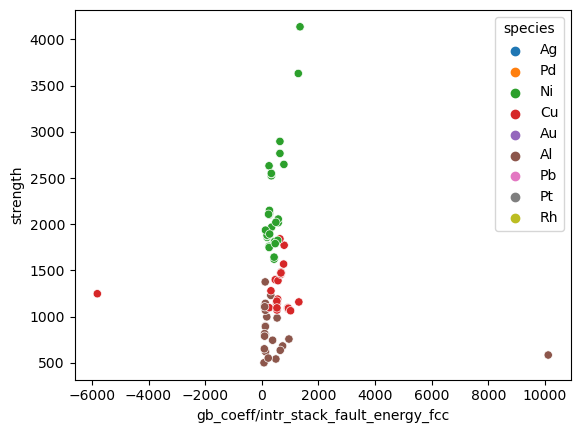

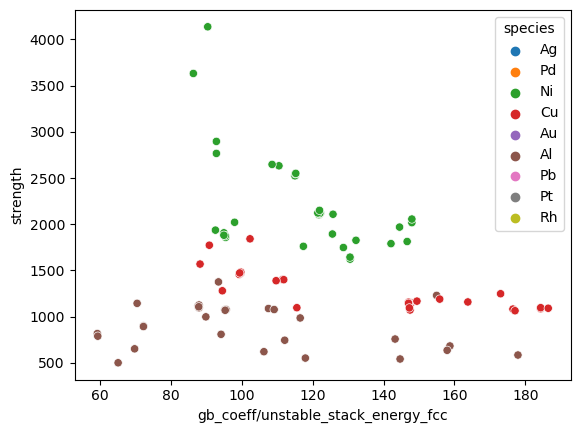

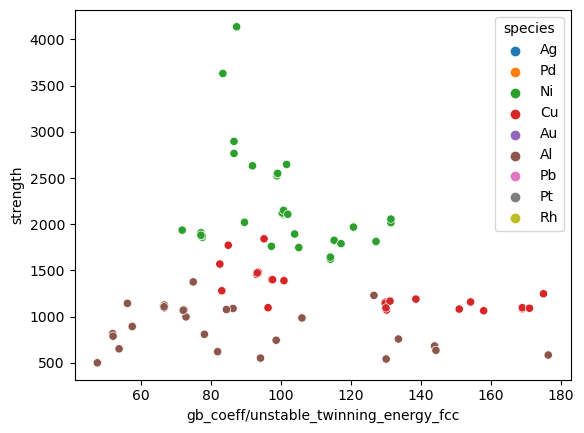

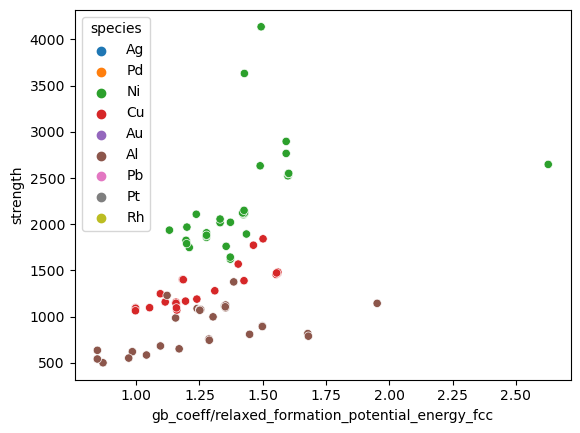

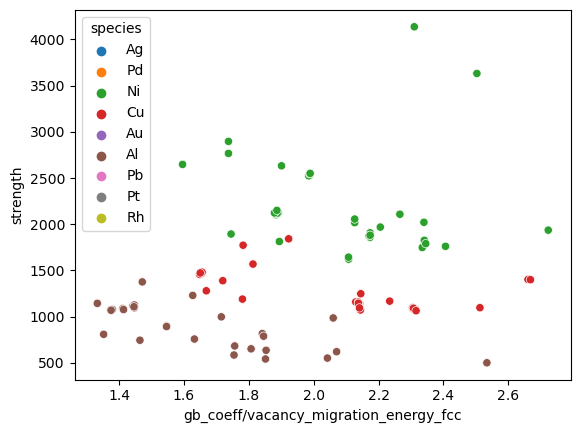

In [7]:
for current_prop in to_try:
    plt.figure()
    y = df['strength_MPa'].values
    x = df['gb_coeff_111'].values/df[current_prop].values
    species = df['species'].values
    test_name = f"gb_coeff/{current_prop}"
    df_test = pd.DataFrame({test_name:x,
                            'strength':y,
                            'species':species})
    sns.scatterplot(data = df_test, x=test_name,y="strength", hue='species')
